In [123]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [124]:
private = pd.read_csv("solar-energy-production-forecasting-privateleaderboard-2023-11-14T12:50:45.csv")
public = pd.read_csv("solar-energy-production-forecasting-publicleaderboard-2023-11-14T12:57:25.csv")


In [125]:
private.columns, public.columns

(Index(['Rank', 'TeamId', 'TeamName', 'LastSubmissionDate', 'Score',
        'SubmissionCount', 'TeamMemberUserNames'],
       dtype='object'),
 Index(['Rank', 'TeamId', 'TeamName', 'LastSubmissionDate', 'Score',
        'SubmissionCount', 'TeamMemberUserNames'],
       dtype='object'))

In [126]:
private = private.drop(['LastSubmissionDate', 'TeamMemberUserNames'], axis=1)
public = public.drop(['LastSubmissionDate', 'TeamMemberUserNames'], axis=1)

# public = public.drop(['LastSubmissionDate', 'TeamMemberUserNames', 'TeamName', 'SubmissionCount'], axis=1)


In [127]:
private['Type'] = [1] * len(private)
public['Type'] = [0] * len(public)


In [128]:

for i in range(0,10):
    base_points = 41 + (100-41)/9 * i
    print(base_points)

41.0
47.55555555555556
54.111111111111114
60.666666666666664
67.22222222222223
73.77777777777777
80.33333333333333
86.88888888888889
93.44444444444444
100.0


In [129]:
# How many VT do we have to beat to get a certain grade, with no deductions on report etc.
dict = {'E': 1, 'D':2, 'C': 5, 'B':7, 'A': 9}

In [131]:

private[private['Rank'] == 0]


,Rank,TeamId,TeamName,Score,SubmissionCount,Type
25,0,11233210,[VT] Goslightning,152.580549,1,1
72,0,11099473,[VT] Shao RyKhan,156.153237,1,1
89,0,11099471,[VT] KenO,157.601687,1,1
99,0,10952991,[VT] La La Lizard,158.597551,1,1
126,0,10952993,[VT] Frostling,162.288180,1,1
139,0,11099468,[VT] Ryleena,163.671764,1,1
161,0,10952997,[VT] Gospion,177.423164,1,1
169,0,10952996,[VT] Kenshi,192.908502,1,1
171,0,10952992,[VT] Quan Gos Chill,367.398424,1,1
173,0,10952994,[VT] Gosborg 2049,468.251433,1,1


In [132]:
# Give iteger grade based on private score

# private[private['Score']> Goslightning]

# A with no 4 or less points deduction.
# private[private['Score'].between(0,Shao_RyKhan)]

# private[private['Score'].between(0,Shao_RyKhan)]



In [136]:
#All teams better than [VT] Kenshi (with D or better). Removes the same teams.

private = private[private['Score'] < 192.908502]
public = public[public['Score'] < 183.506486]


In [138]:
leaderboard_concat = pd.concat([private,public])

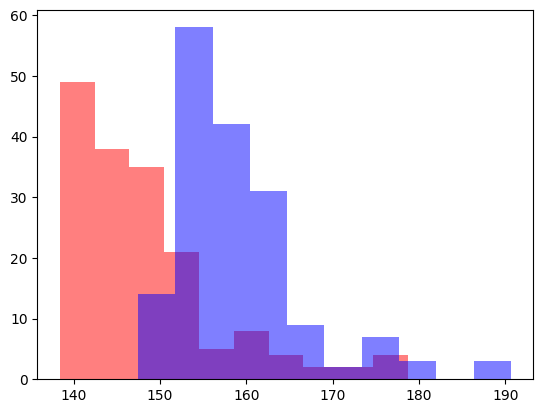

In [139]:
# Histogram things

x_1 = private['Score']
x_2 = public['Score']

fig, ax = plt.subplots()
ax.hist(x_2, color = 'red',alpha = 0.5)
ax.hist(x_1, color = "blue",alpha = 0.5)
plt.show()


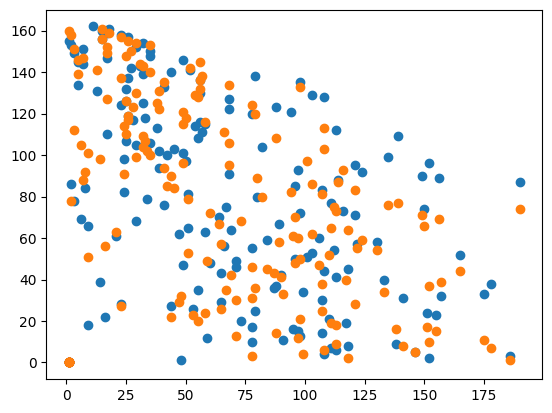

In [140]:
x_1 = private['SubmissionCount']
x_2 = public['SubmissionCount']
y_1 = private['Rank']
y_2 = public['Rank']



fig, ax = plt.subplots()
ax.scatter(x_1, y_1)
ax.scatter(x_2, y_2)
plt.show()

# leaderboard_concat[leaderboard_concat['Type'] == 0].plot(x="SubmissionCount", y = "Rank", type= "scatter")

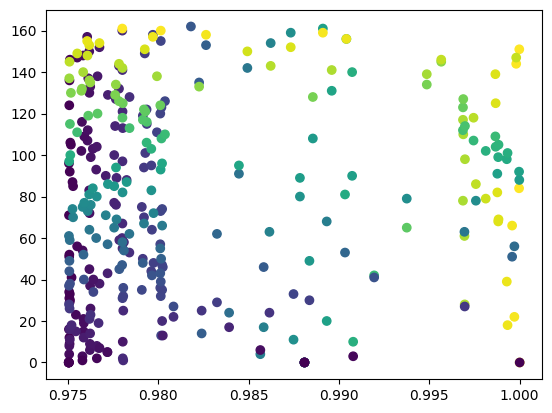

In [148]:
x_1 = private['TeamId']/private['TeamId'].max()
x_2 = public['TeamId']/public['TeamId'].max()
y_1 = private['Rank']
y_2 = public['Rank']



fig, ax = plt.subplots()
ax.scatter(x_1, y_1, c = x_1)
ax.scatter(x_2, y_2, c = y_2)
plt.show()

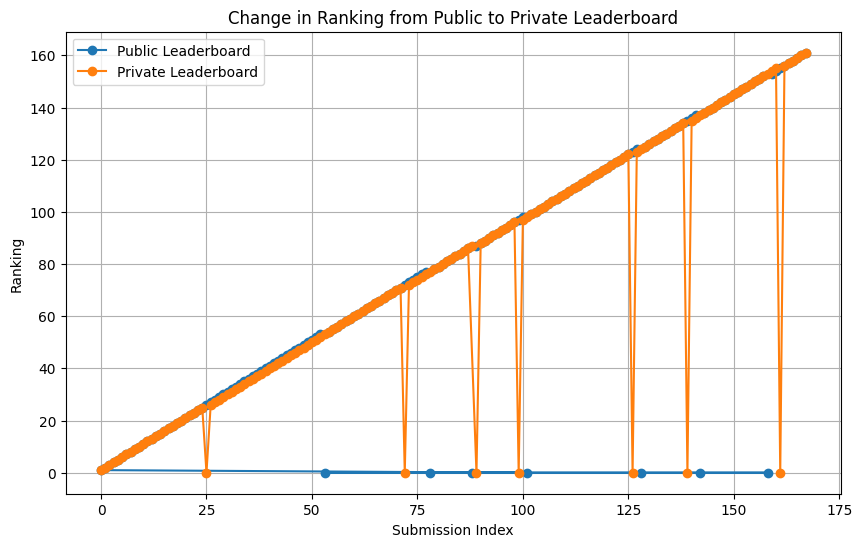

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual data
public_ranking = public['Rank']
private_ranking = private['Rank']

# Sort indices based on public leaderboard ranking
sorted_indices = np.argsort(public_ranking)

# Sort both public and private rankings based on public leaderboard ranking
public_ranking_sorted = public_ranking[sorted_indices]
private_ranking_sorted = private_ranking[sorted_indices]

# Plot the change in ranking
plt.figure(figsize=(10, 6))
plt.plot(public_ranking_sorted, label='Public Leaderboard', marker='o')
plt.plot(private_ranking_sorted, label='Private Leaderboard', marker='o')

# Customize the plot
plt.title('Change in Ranking from Public to Private Leaderboard')
plt.xlabel('Submission Index')
plt.ylabel('Ranking')
plt.legend()
plt.grid(True)
plt.show()
